# Homework 6
*Fill in your name and the names of any students who helped you below.* 

> I affirm that I personally wrote the text, code, and comments in this homework assignment. 

\- \[Jun Ryu\]

# Comments/docstrings are required for problems 1 and 3. They are not required for problems 2.

## Problem 0

It is highly recommended that you work with your group to fully complete the recent Discussion assignments related to the Palmer Penguins data set, as these will directly help with your project. 

## Problem 1

Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years. 

Here, we'll work with an excerpt of the Gapminder data. This excerpt has been packaged up and made available via Jenny Bryan's [`gapminder` repo](https://github.com/jennybc/gapminder) on Github. 

Run the code below to retrieve the data and take a look. As usual, you can also directly download the data by pasting the url into your browswer, saving the file, and reading it in locally via `pandas.read_csv`. 

In [1]:
import pandas as pd
        
url = "https://philchodrow.github.io/PIC16A/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Use the `gapminder` data to create the folowing visualization. Here, each trendline corresponds to a distinct country, which in turn lies on the stated continent. 

<figure class="image" style="width:100%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/homework/gapminder_p1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

You should achieve this result **without for-loops**, and also without manually creating the plot on each axis. You may find it useful to define additional data structures, such as dictionaries, that assign colors or axis indices to each continent. Feel free to modify aesthetic details of the plots, such as the colors. 

**Hint**: Try `df.groupby(["country"]).apply(f)`, where `f` is some very smart function that you have figured out. 

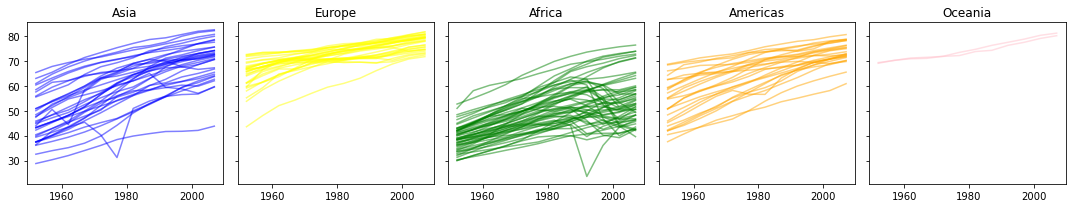

In [21]:
# your solution here
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,5,figsize = (15,3),sharex = True,sharey = True) #use sharex and sharey to have the same axes across subplots

axes = {"Asia" : 0, "Europe" : 1, "Africa" : 2, "Americas" : 3, "Oceania" : 4} #create axis indices
colors = {"Asia" : "blue", "Europe" : "yellow", "Africa" : "green", "Americas" : "orange", "Oceania" : "pink"} #create color assignments

#use lambda function to make sure plots are divided based on the continents
plot_function = lambda x: ax[axes.get(list(x["continent"])[0])].plot(x["year"],x["lifeExp"],\
                            color = colors.get(list(x["continent"])[0]), alpha=0.5)

#use the same logic to assign titles to each subplot
set_title = lambda x: ax[axes.get(list(x["continent"])[0])].set(title=(list(x["continent"])[0]))

#combine the two lambda functions above
plot = lambda x: (plot_function(x), set_title(x))

gapminder.groupby(["country"]).apply(plot) #use groupby and apply to plot each country in its respective plot
plt.tight_layout() 

## Problem 2

In this problem, you will create several attractive visualizations of the `gapminder` data set using the [Seaborn package](https://seaborn.pydata.org/). Seaborn is a high-level interface to Matplotlib specially designed for working with Pandas data frames. Seaborn makes it relatively easy to create complex, multifaceted data graphics. The drawback is that it can sometimes be more difficult to exercise control over figure details, such as axis labels or figure size.

Part of the learning objective for this problem is for you to **practice learning from documentation and examples**. I have given you some pointers in each problem, but it will be up to you to fill in the blanks. 

Import the `seaborn` package with the line `import seaborn as sns`. Then, run the code block below to create a scatterplot of `gdpPercap` (gross domestic product per capita) against `lifeExp` (life expectancy), with different colors for each continent. 

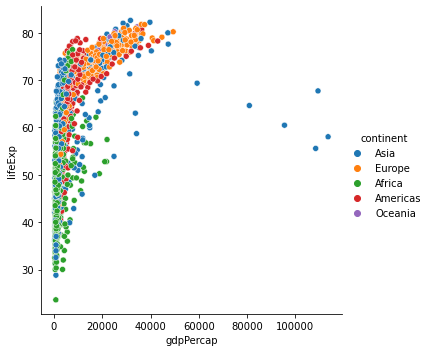

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

fgrid = sns.relplot(x = "gdpPercap", 
                    y = "lifeExp", 
                    hue = "continent", 
                    data = gapminder)

The result of the above code is that `fgrid` is now a `FacetGrid` object (we'll see why it's called that in a minute). However, under the hood, we are still dealing with Matplotlib. To retrieve the individual plotting axis, we can access it from the `fgrid.axes` attribute, which is a 2d Numpy array containing the axes. For example, to make the horizontal axis logarithmic and labels, we can do this: 

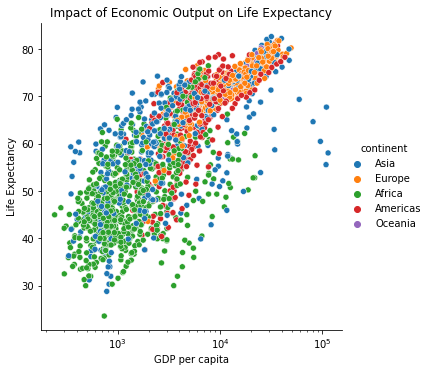

In [4]:
fgrid = sns.relplot(x = "gdpPercap", 
                    y = "lifeExp", 
                    hue = "continent", 
                    data = gapminder)

fgrid.axes[0][0].semilogx()

labels = fgrid.axes[0][0].set(xlabel = "GDP per capita", 
                              ylabel = "Life Expectancy",
                              title  = "Impact of Economic Output on Life Expectancy")

Not bad! Note that seaborn has effectively looped over the different continents, without us needing to use `for`-loops or `apply`. 

### Part A

Create the following plot using Seaborn: 

<figure class="image" style="width:100%">
  <img src="https://philchodrow.github.io/PIC16A/homework/seaborn-example-1.png
" alt="" width="800px">
</figure>

In this figure, each point represents a country, and the size of the point corresponds to the population. 

In this part and the next, it is not necessary that your plot *precisely* match mine -- feel free to modify the sizes of labels, change the color scheme, etc. 

#### Hints

- You should use [`sns.relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) to create the figure. 
- Look in the [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html) for examples illustrating how to create a multi-panel figure without using `plt.subplots()`. 
- The size of the figure is controlled by the `height` and `aspect` ratio arguments to `relplot`. I used `height = 2` and `aspect = 1.3`, but other choices are also fine. 
- When using column wrapping to create the `3 x 4` axis array, the resulting `fgrid.axes` array is no longer 2-dimensional, but 1-dimensional. 

[]

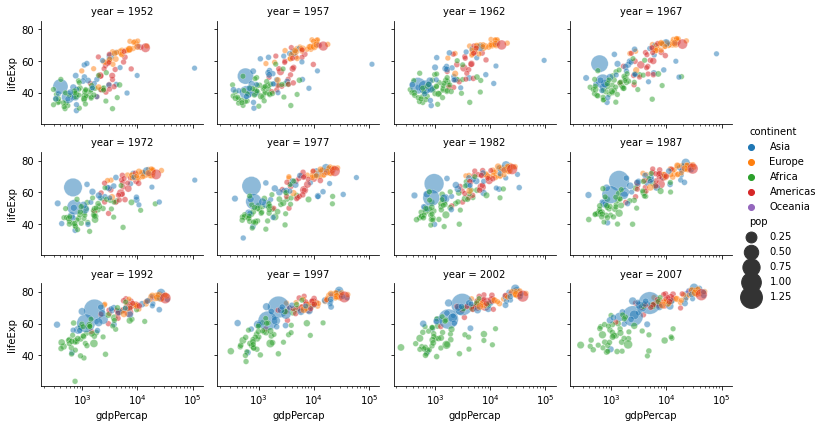

In [5]:
figure1 = sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp", hue="continent", height = 2, aspect = 1.3,\
                      col = "year", col_wrap = 4, size = "pop", sizes = (30,500), alpha = .5)

figure1.axes[0].semilogx()

### Part B

Create the following plot using Seaborn:

<figure class="image" style="width:100%">
  <img src="https://philchodrow.github.io/PIC16A/homework/seaborn-example-2.png
" alt="" width="500px">
</figure>

#### Hints

- The easiest way is to again use `relplot`. This function defaults to producing scatterplots, but if you check the [gallery](https://seaborn.pydata.org/examples/index.html) you'll find examples of how to specify keywords that create line charts instead. 

[]

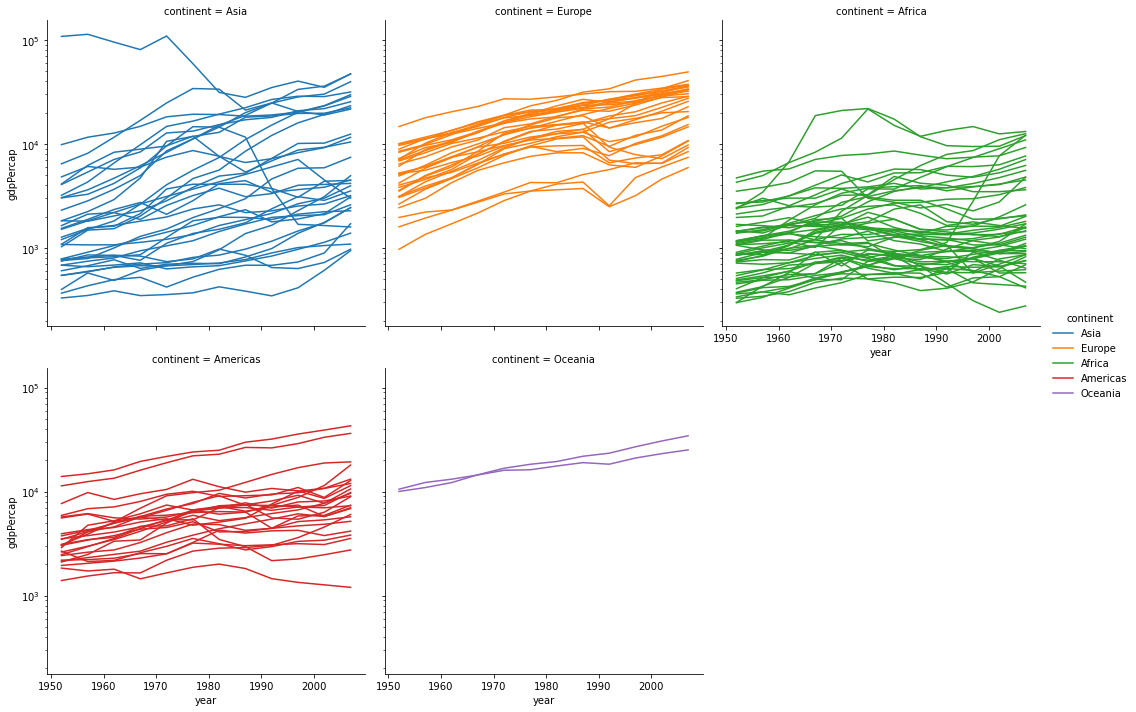

In [6]:
figure2 = sns.relplot(data=gapminder, x="year", y="gdpPercap", col="continent", hue = "continent",\
                      kind = "line", col_wrap = 3, estimator = None, units = "country")

figure2.axes[1].semilogy()

### Part C

Create the following (very long) plot using Seaborn:

<figure class="image" style="width:100%">
  <img src="https://philchodrow.github.io/PIC16A/homework/seaborn-example-3.png
" alt="" width="300px">
</figure>

#### Hints

- Use `sns.barplot`. 
- Pick a single year of the `gapminder` data frame to show. In the example, I showed data from 2002 only. 
- To sort the bars in ascending order by continent, you should sort the data frame that you pass to `sns.barplot`. 
- The argument `dodge = False` is a helpful keyword that will keep your bars centered. 
- I used a different color palette just to shake things up a little. 

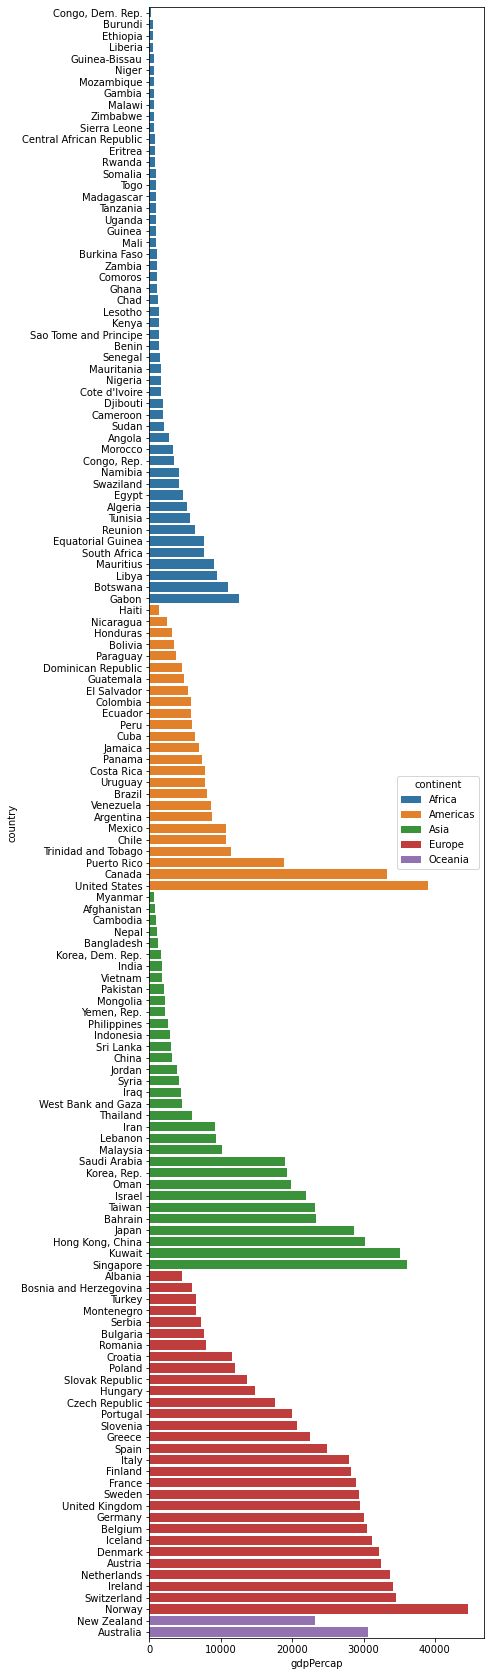

In [7]:
figure3, ax = plt.subplots(1, figsize = (6,30))
sub_gapminder = gapminder[gapminder["year"]==2002]
sub_gapminder = sub_gapminder.sort_values(["continent", "gdpPercap"])
figure3 = sns.barplot(data=sub_gapminder, x="gdpPercap", y="country", hue="continent", dodge = False)

### Part D

Create the one last plot using Seaborn:

<figure class="image" style="width:100%">
  <img src="https://philchodrow.github.io/PIC16A/homework/seaborn-example-4.png
" alt="" width="500px">
</figure>

#### Hints

- This is a boxplot. 
- You should again pick a single year of the `gapminder` data frame to show. In the example, I show data from 2002 only. 

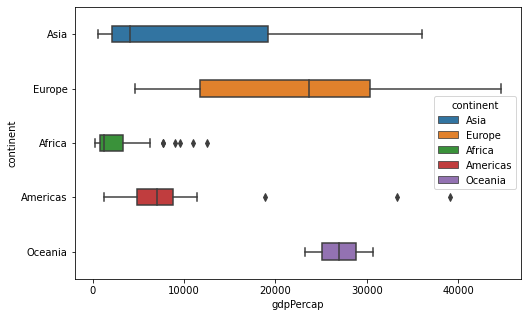

In [8]:
figure4, ax = plt.subplots(1, figsize = (8,5))
sub_gapminder = gapminder[gapminder["year"]==2002]
figure4 = sns.boxplot(data=sub_gapminder, x="gdpPercap", y="continent", hue="continent", dodge = False, width = 0.3)

## Problem 3

In our first lecture on machine learning, we did linear regression "by hand." In this problem, we will similarly perform logistic regression "by hand." This homework problem is closely parallel to the lecture, and so you might want to have the [notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb) handy.  

Although logistic regression is a relatively simple model, it is a foundation for many modern deep neural nets. Additioanlly, logistic regression itself is still often used in applied contexts even now. 

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">&quot;When we raise money it’s AI, when we hire it&#39;s machine learning, and when we do the work it&#39;s logistic regression.&quot;<br><br>(I&#39;m not sure who came up with this but it&#39;s a gem 💎)</p>&mdash; Dr. Daniela Witten (@daniela_witten) <a href="https://twitter.com/daniela_witten/status/1177294449702928384?ref_src=twsrc%5Etfw">September 26, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Whereas linear regression is often used to measure arbitrary quantities like GDP or happiness scores, logistic regression is primarily used to estimate *probabilities*. For example, we might use logistic regression to estimate the probability of a passenger surviving the Titanic crash, a borrower defaulting on a loan, or an email being spam.

For concreteness, let's say that we are considering the latter case. Suppose that we wish to model the probability that an email is spam as a function of the proportion of flag words (like "investment", "capital", "bank", "account", etc.) in the email's body text. Call this proportion $x$. $x$ is then a variable between $0$ and $1$. 

In logistic regression, we suppose that the probability $p$ that an email is spam has the form 

$$p = \frac{1}{1+e^{-ax - b}}\;,$$

where $a$ and $b$ are again parameters. Let's see how this looks. 

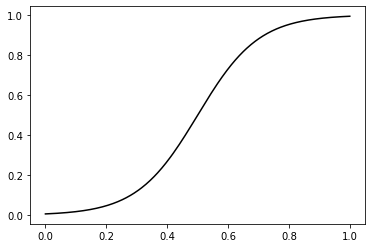

In [9]:
# run this block

import numpy as np
from matplotlib import pyplot as plt

n_points = 1000

a = 10
b = -5

x = np.sort(np.random.rand(n_points))
p = 1/(1+np.exp(-a*x - b))

fig, ax = plt.subplots(1)
ax.plot(x, p, color = "black")

As usual, in practice we don't have access to the true function telling us the probability that an email is spam. Instead, we have access to data telling us whether or not the email really IS spam. We can model this situation by flipping a biased coin for each email, with the probability of heads determined by the modeled probability. 

In [10]:
# run this block
y = 1.0*(np.random.rand(n_points) < p)

A value of 1 indicates that the email is indeed spam, while a value of 0 indicates that the email is not spam. 

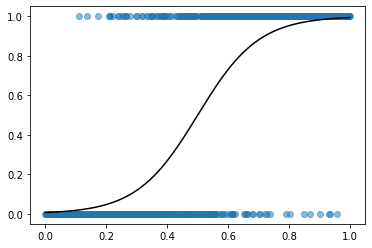

In [11]:
# run this block
ax.scatter(x, y,  alpha = 0.5)
fig

Notice that there are more spam emails where the model gives a high probability, and fewer where the model gives a lower probability. However, there may be some non-spam emails with even high probability -- sometimes we get legitimate emails about bank accounts, investments, etc.  

Of course, we don't have access to the true model, so our practical situation looks more like this: 

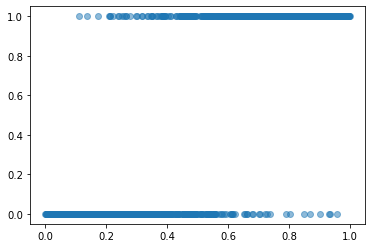

In [12]:
# run this block
fig, ax = plt.subplots(1)
ax.scatter(x, y, alpha = 0.5)

We would like to use logistic regression to try to recover something close to the true model. 

## Part A

Write the model function `f`. The arguments of `f` should be the predictor variables `x` and the parameters `a` and `b`. The output of `f` should be the spam probabilities under the logistic model (see equation above) for these data. Use `numpy` tools, without `for`-loops. If you scan the above code carefully, you'll observe that most of this code is already written for you. 

This is a simple function, but **please add a short docstring indicating** what kinds of input it accepts and how to interpret the output. 

Comments are necessary only if your function body exceeds one line. 

In [13]:
# your solution

def f(x,a,b):
    """
    input: x (proportion of "flag" words in the email's body text), a and b (parameters)
    output: calculates the probability that an email is spam using logistic regression
    """
    return 1/(1+np.exp(-a*x - b))

## Part B

Plot 10 candidate models against the data, using randomly chosen values of `a` between 5 and 15 and randomly chosen values of `b` between -2.5 and -7.5. Your plot should resemble in certain respects the third plot in [these lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb). 

Comments are not necessary in this part. 

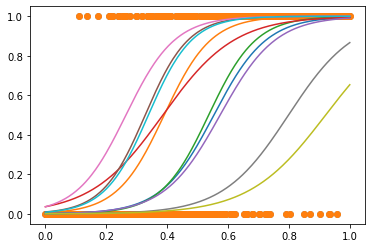

In [14]:
# your solution here
ax.scatter(x,y)
for i in range(10):
    a = 10*np.random.rand()+5
    b = 5*np.random.rand()-7.5
    ax.plot(x,f(x,a,b))
    
fig

## Part C

The *loss function* most commonly used in logistic regression is the *negative cross-entropy*. The negative cross-entropy of the `i`th observation is 

$$-\left[y_i \log \hat{p}_i + (1-y_i)\log(1-\hat{p}_i)\right]$$

where $y_i \in \{0,1\}$ is the `i`th entry of the target data and $\hat{p}_i$ is the model's estimated probability that $y_i = 1$. The negative cross-entropy of the entire data set is the sum of the negative cross-entropies for each individual observation. 

Write a function that computes the negative cross entropy as a function of `x`, `y`, `a`, and `b`. This can be done in no more than two lines using `numpy`, without `for`-loops. Don't forget which logarithm is \#BestLogarithm.  

As in Part B, please write a short docstring describing what your function does and what inputs it accepts. Comments are necessary only if your function body exceeds two lines. 

In [15]:
# your solution here
def logistic_NCE(x,y,a,b):
    """
    input: x,a,b (as described in part A), and y (a value of 0 or 1 depending on if the email is considered spam or not in the model)
    output: the negative cross-entropy of the entire data set (loss function for logistic regression)
    """
    preds = f(x,a,b)
    return np.sum(-((y*np.log(preds))+((1-y)*np.log(1-preds))))

## Part D

On a single axis, plot 100 distinct models (using the code that you wrote in) in Part B. Highlight the one with the lowest negative cross entropy in a different color -- say, red. Compare the best values of `a` and `b` that you found to the true values, which were `a = 10` and `b = -5`. Are you close? 

The plot you produce should resemble, in some respects, the fifth plot in [these lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb). 

It is not necessary to write comments in this part. 

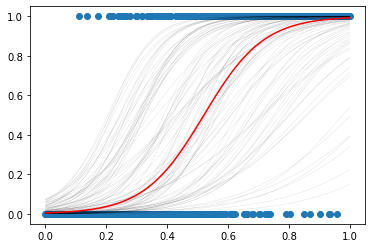

In [16]:
# your solution here
fig, ax = plt.subplots(1)
ax.scatter(x,y)

best_a, best_b = 0, 0
best_error = np.inf

for i in range(100):
    a = 10*np.random.rand()+5
    b = 5*np.random.rand()-7.5 

    error = logistic_NCE(x,y,a,b)
    if error < best_error:
        best_error = error
        best_a, best_b = a,b
    preds = f(x, a, b)
    ax.plot(x, preds, color = "black", alpha = 0.5, linewidth = .1)

best_preds = f(x, best_a, best_b)
ax.plot(x, best_preds, color = "red")

In [17]:
from scipy.optimize import minimize
res = minimize(lambda z: logistic_NCE(x, y, z[0], z[1]), np.array([0,0]))
best_a, best_b = res.x
best_a, best_b #pretty close values!

(9.940600423896052, -4.906868473721624)

It is not required to use `scipy.optimize` to more accurately estimate `a` and `b` for this homework assignment, but you are  free to do so if you wish. You may then use the optimal estimates in the following part. 

## Part E

In classification tasks, we evaluate not just the standard loss function, but also the *accuracy* -- how often does the model correctly classify the data? Let's say that the model classifies an email as spam according to the following rule: 

1. If $\hat{p}_i$ (the model probability plotted above) is larger than $c$, classify the email as spam. 
2. If $\hat{p}_i$ is less than or equal to $c$, classify the email as not-spam. 

Write a function called `positive_rates` which accepts the following arguments: 

1. The data, `x` and `y`. 
2. The best parameters `best_a` and `best_b`. 
3. A threshold `c` between 0 and 1. 

This function should output two numbers. The first of these is *false positive rate*: the proportion of non-spam emails that the model incorrectly labels as spam. The second is the *true positive rate*: the proportion of spam emails that the model correctly labels as spam. 

For example: 

```python 
positive_rates(x, y, best_a, best_b, c = 0.5)
```
```
(0.05058365758754864, 0.7469135802469136)
```

**Note**: due to randomization, your numerical output may be  different. 

Please write a descriptive docstring for your function. Comments are necessary only if your function body exceeds five lines. 

In [18]:
# your solution here
def positive_rates(x,y,best_a,best_b,c):
    """
    uses the best model to find the false positive rate and the true positive rate
    find the false positive rate by locating a case where we only grab the non-spam emails that the model labels as spam
    and dividing that by the amount of non-spam emails
    find the true positive rate by locating a case where we only grab the spam emails that the model labels as spam
    and dividing that by the amount of spam emails
    """
    false_rate = ((f(x,best_a,best_b) - y) > c).mean() / (y==0).mean()
    true_rate = ((y + f(x,best_a,best_b)) > (1+c)).mean() / (y==1).mean()
    return [false_rate, true_rate]

In [19]:
# demonstrate your function here
positive_rates(x, y, best_a, best_b, c = 0.6)

[0.09145129224652088, 0.8169014084507042]

## Part F

Plot the *receiver operating characteristic* (ROC) curve for the logistic model with parameters `best_a` and `best_b`. The ROC curve is the plot of the `false_positive` rate (on the horizontal axis) against the `true_positive` rate (on the vertical axis) as the threshold `c` is allowed to vary. Additionally, plot a diagonal line ("the line of equality") between the points (0,0) and (1,1). Your ROC curve should lie noticeably above the line of equality. Plot your curves in different colors and add a legend to help your reader understand the plot. 

It is ok to use `for`-loops and list comprehensions in this part. 

Your result should look something like this, although it won't be exactly the same due to randomness. 

<figure class="image" style="width:60%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/homework/roc-example.png" alt="The horizontal and vertical axes are the false positive and true positive rates. A diagonal black line goes from the bottom left to the top right. A red curve above the black line indicates the classifier performance.">
  <figcaption><i></i></figcaption>
</figure>

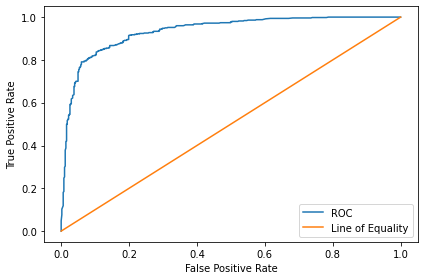

In [20]:
# plot code here

fig, ax = plt.subplots(1)
space = np.linspace(0,1,1001) #create evenly spaced points (0, .001, .002, ..., .999, 1)
#use list comprehensions to run the positive_rates function across our evenly spaced points
false_rate = [positive_rates(x, y, best_a, best_b, c = space[i])[0] for i in range(len(space))]
true_rate = [positive_rates(x, y, best_a, best_b, c = space[i])[1] for i in range(len(space))]

ax.plot(false_rate, true_rate, label = "ROC") #plot the curve
ax.plot(space, space, label = "Line of Equality") #plot the diagonal line
ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate") #labeling axes
ax.legend() #add a legend
plt.tight_layout()

Generally speaking, a "good" classifier is one that can reach the closest to the top-left corner of the ROC diagram. This is a classifier that can achieve a high rate of true positives, while keeping a low rate of false positives. There are various ways to measure how "good" an ROC curve is, which are beyond our present scope. 